<a href="https://colab.research.google.com/github/Mohitvenkatasai/Calories/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem statement

### Importing the neccesary libraries for EDA and Linear regression

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet
import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## Loading  and exploring the data

In [ ]:
df_1=pd.read_csv('exercise.csv')
df_1.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


#### This is the data from exercise file

In [ ]:
df_2=pd.read_csv('calories.csv')
df_2.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


##### This is the data from calories file

In [ ]:
print(df_2.shape)
print(df_1.shape)

(15000, 2)
(15000, 8)


##### This is the shape of two data frmaes each having 15000 rows and Exercise data have 8 columns and Calories data have 2 colms

In [ ]:
df=pd.merge(df_1,df_2,on='User_ID',how='left')
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


##### Joined both the data-sets using merge function and used left join,so that we have clear data for further process.  

In [ ]:
df.shape

(15000, 9)

##### After joining the 2 data sets this is the shape of the actual data set it is Rows=15000 and columns=9

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


##### This cell is showing the information of our data we have
Float columns,
Intergers columns,
object/categorical columns.

In [ ]:
df.describe().T,df.describe(include='object').T

(              count          mean           std         min          25%  \
 User_ID     15000.0  1.497736e+07  2.872851e+06  10001159.0  12474190.75   
 Age         15000.0  4.278980e+01  1.698026e+01        20.0        28.00   
 Height      15000.0  1.744651e+02  1.425811e+01       123.0       164.00   
 Weight      15000.0  7.496687e+01  1.503566e+01        36.0        63.00   
 Duration    15000.0  1.553060e+01  8.319203e+00         1.0         8.00   
 Heart_Rate  15000.0  9.551853e+01  9.583328e+00        67.0        88.00   
 Body_Temp   15000.0  4.002545e+01  7.792299e-01        37.1        39.60   
 Calories    15000.0  8.953953e+01  6.245698e+01         1.0        35.00   
 
                    50%          75%         max  
 User_ID     14997285.0  17449278.75  19999647.0  
 Age               39.0        56.00        79.0  
 Height           175.0       185.00       222.0  
 Weight            74.0        87.00       132.0  
 Duration          16.0        23.00        30.0  

##### The above cell is decsribing the statistical data of  both numerical columns and catagorical columns

### Looking for duplicate values And removing duplicated values

In [ ]:
df.duplicated().sum()

0

##### The data contains no dupliacte rows/values

### Checking for null values

In [ ]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

##### The data contains no null values

### EDA (Exploratory Data Analysis)

#### Univariate data

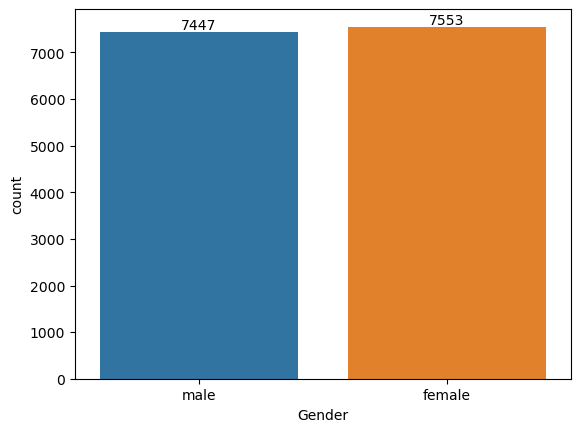

In [ ]:
a=sns.countplot(x=df.Gender)
for bar in a.containers:
    a.bar_label(bar);

###### The above bar chart showing the number of female and males in the data which is 7553 and 7447 respecttively

In [ ]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

### Bivarite

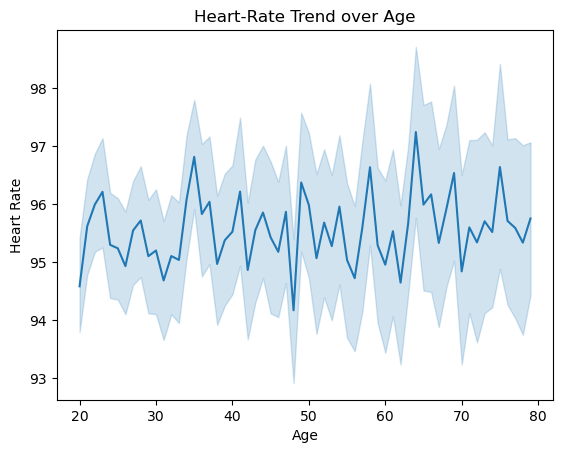

In [ ]:
sns.lineplot(data=df, x='Age', y='Heart_Rate')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.title('Heart-Rate Trend over Age')
plt.show()

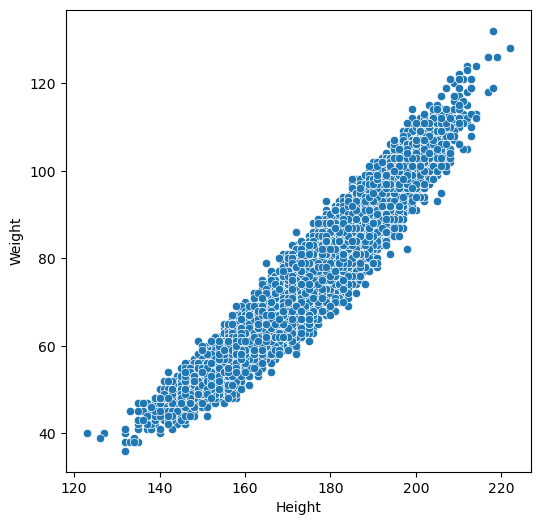

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=df.Height,y=df.Weight)
plt.show()

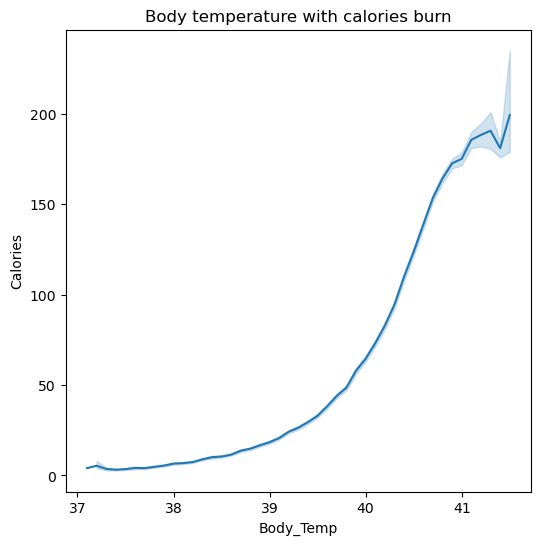

In [ ]:
plt.figure(figsize=(6,6))
sns.lineplot(x=df.Body_Temp,y=df.Calories)
plt.title('Body temperature with calories burn')
plt.show()


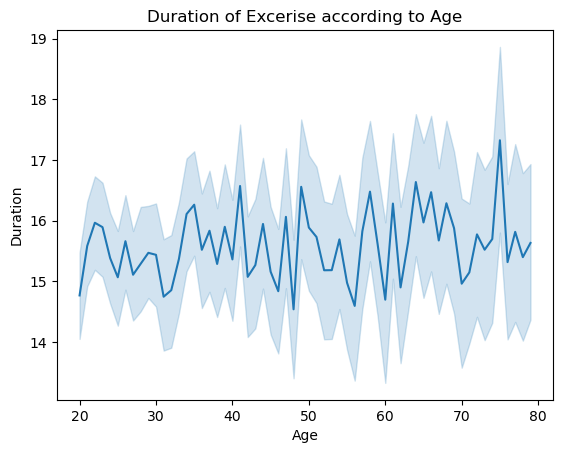

In [ ]:
sns.lineplot(data=df, x='Age', y='Duration')
plt.xlabel('Age')
plt.ylabel('Duration')
plt.title('Duration of Excerise according to Age')
plt.show()

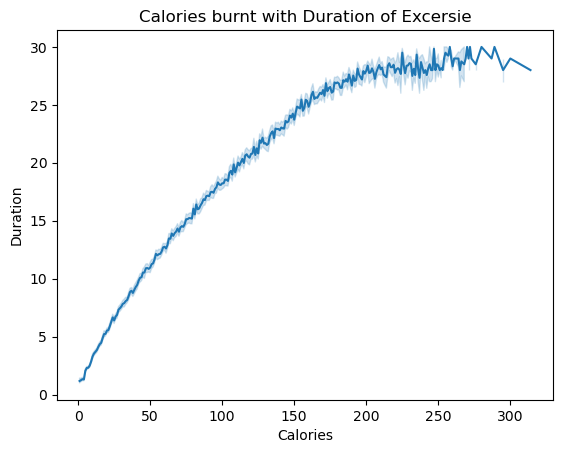

In [ ]:
sns.lineplot(data=df, x='Calories', y='Duration')
plt.xlabel('Calories')
plt.ylabel('Duration')
plt.title('Calories burnt with Duration of Excersie')
plt.show()

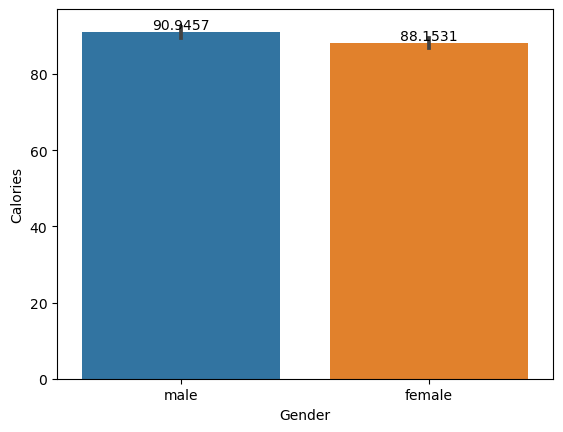

In [ ]:
b=sns.barplot(data=df, x='Gender', y='Calories')
for bar in b.containers:
    b.bar_label(bar);

### Feature engineering
Converting categorical columns into numerical columns(Encoding)
Standardization
Normalization

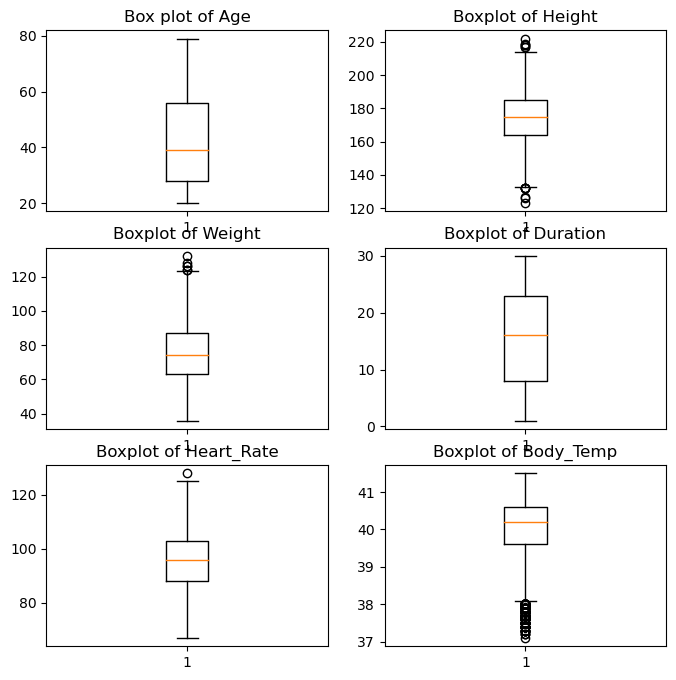

In [ ]:
fig, ((ax0,ax1),(ax2,ax3),(ax4,ax5))=plt.subplots(nrows=3,
                                     ncols=2,
                                     figsize=(8,8));

boxplot=ax0.boxplot(df['Age'])
ax0.set(title='Box plot of Age')
boxplot2=ax1.boxplot(df['Height'])
ax1.set(title='Boxplot of Height')
boxplot3=ax2.boxplot(df['Weight'])
ax2.set(title='Boxplot of Weight')
boxplot4=ax3.boxplot(df['Duration'])
ax3.set(title='Boxplot of Duration')
boxplot5=ax4.boxplot(df['Heart_Rate'])
ax4.set(title='Boxplot of Heart_Rate')
boxplot6=ax5.boxplot(df['Body_Temp'])
ax5.set(title='Boxplot of Body_Temp');

##### We can se there are outliers in height,weight and Body-temoerature columns we are removing those outliers using IQR mehod

In [ ]:
p=sorted(df['Height'])
q1,q3=np.percentile(p,[25,75])
iqr=q3-q1
L_b=q1-(1.5*(iqr))
U_b=q3+(1.5*(iqr))
below=df['Height'] > L_b
above=df['Height'] < U_b
df=df[below & above]

In [ ]:
p=sorted(df['Weight'])
q1,q3=np.percentile(p,[25,75])
iqr=q3-q1
L_b=q1-(1.5*(iqr))
U_b=q3+(1.5*(iqr))
below=df['Weight'] > L_b
above=df['Weight'] < U_b
df=df[below & above]


In [ ]:
p=sorted(df['Heart_Rate'])
q1,q3=np.percentile(p,[25,75])
iqr=q3-q1
L_b=q1-(1.5*(iqr))
U_b=q3+(1.5*(iqr))
below=df['Heart_Rate'] > L_b
above=df['Heart_Rate'] < U_b
df=df[below & above]

In [ ]:
p=sorted(df['Body_Temp'])
q1,q3=np.percentile(p,[25,75])
iqr=q3-q1
L_b=q1-(1.5*(iqr))
U_b=q3+(1.5*(iqr))
below=df['Body_Temp'] > L_b
above=df['Body_Temp'] < U_b
df=df[below & above]

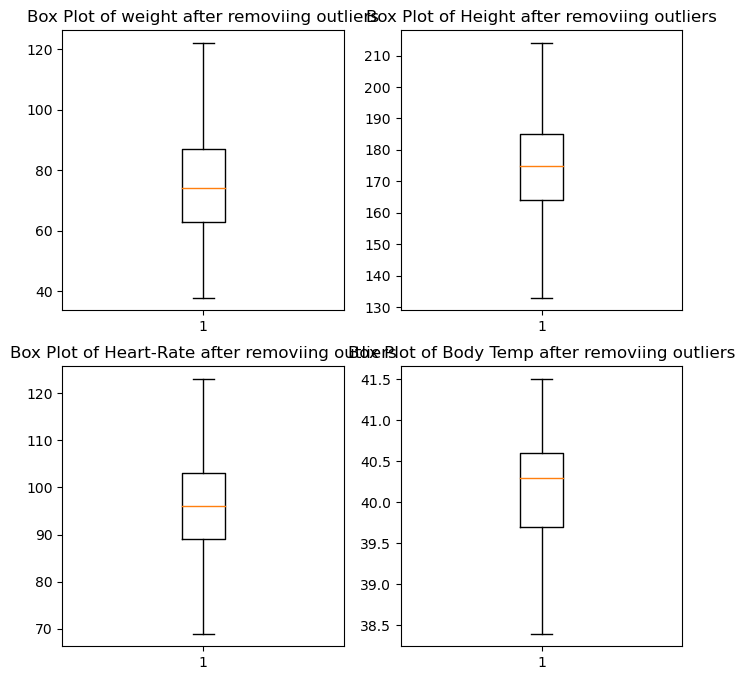

In [ ]:
fig, ((ax0,ax1),(ax2,ax3))=plt.subplots(nrows=2,
                                     ncols=2,
                                     figsize=(8,8));

boxplot3=ax0.boxplot(df['Weight'])
ax0.set(title='Box Plot of weight after removiing outliers')
boxplot2=ax1.boxplot(df['Height'])
ax1.set(title='Box Plot of Height after removiing outliers')
boxplot4=ax2.boxplot(df['Heart_Rate'])
ax2.set(title='Box Plot of Heart-Rate after removiing outliers')
boxplox5=ax3.boxplot(df['Body_Temp'])
ax3.set(title='Box Plot of Body Temp after removiing outliers');

In [ ]:
df.Gender=df.Gender.replace({'female':1,'male':0})
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,0,78,193.0,97.0,2.0,84.0,38.3,11.0


<Axes: >

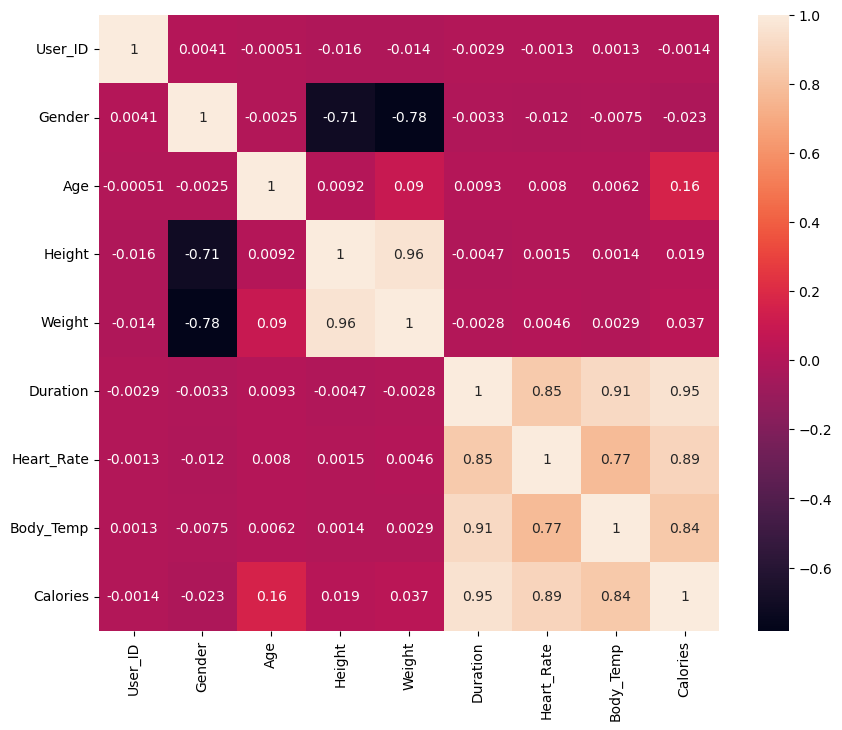

In [ ]:
corr=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)


### As we can see Duration, Heart-rate and Body-Temp are having more impact on our Target column(Calories).But for better accuracy we are taking Weight, height and Age.We are dropping User ID and Gender column as those are having 0 to negative correlation.

### spliting the data

In [ ]:
df=df.drop(['User_ID','Gender'],axis=1)

In [ ]:
X=df.drop(['Calories'],axis=1)
y=df['Calories']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=33)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((11618, 6), (2905, 6), (11618,), (2905,))

## Model Training

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_predict=model.predict(X_test)
y_predict
MSE=mean_squared_error(y_test,y_predict)
print(MSE)
RMSE=np.sqrt(MSE)
print(RMSE)
MAE=mean_absolute_error(y_test,y_predict)
print(MAE)
R2=r2_score(y_test,y_predict)
print(R2)

125.82642525540359
11.21723786212112
8.375440930165928
0.9664148363818968


In [ ]:
y_predict_train=model.predict(X_train)
MSE=mean_squared_error(y_train,y_predict_train)
print(MSE)
RMSE=np.sqrt(MSE)
print(RMSE)
MAE=mean_absolute_error(y_train,y_predict_train)
print(MAE)
R2=r2_score(y_train,y_predict_train)
print(R2)

127.60777198117246
11.29636100614585
8.34279797989133
0.9664159199047616


In [ ]:
x_new=pd.DataFrame({'Age':34,
                   'Height': 187,
                   'Weight': 98,
                   'Duration': 34,
                   'Heart_Rate':78,
                   'Body_Temp': 68},
                  index=[7788])
x_new

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
7788,34,187,98,34,78,68


In [ ]:
model.predict(x_new)

array([-306.10724166])

In [ ]:
d1 = pd.DataFrame({
    'MSE': [120.52],
    'RMSE': [10.97],
    'MAE': [8.99],
    'R2': [0.96]
}, index=['Test_Data'])
d1

,MSE,RMSE,MAE,R2
Test_Data,120.52,10.97,8.99,0.96


In [ ]:
d2 = pd.DataFrame({
    'MSE': [129.99],
    'RMSE': [11.40],
    'MAE': [8.42],
    'R2': [0.96]
}, index=['Train_Data'])
d2

,MSE,RMSE,MAE,R2
Train_Data,129.99,11.4,8.42,0.96
